In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data
depth_values = [2571 , 2741 , 2891 , 3571 , 3971 , 4371 , 4771 , 5150 , 5571, 5971, 6371] #km
pressure_values = [117, 127, 135, 206, 243, 277, 306, 329, 349, 360, 364] #GPa
temp_values = [3018, 3564, 3750, 4265, 4500, 4693, 4846, 4961, 5041, 5087, 5151] #K

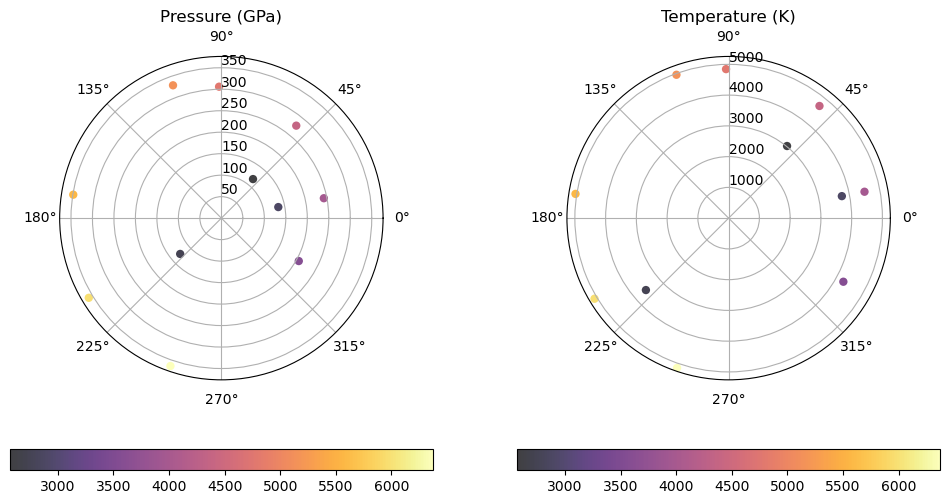

In [3]:
# Convert depth values to radians for the polar plot
depth_radians = np.deg2rad(depth_values)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12, 6))

# Plot pressure with Inferno colormap
pressure_color = ax1.scatter(depth_radians, pressure_values, c=depth_values, cmap='inferno', linewidth=0, alpha=0.75)
ax1.set_rlabel_position(90)
ax1.set_title("Pressure (GPa)")
fig.colorbar(pressure_color, ax=ax1, orientation='horizontal')

# Plot temperature with Inferno colormap
temp_color = ax2.scatter(depth_radians, temp_values, c=depth_values, cmap='inferno', linewidth=0, alpha=0.75)
ax2.set_rlabel_position(90)
ax2.set_title("Temperature (K)")
fig.colorbar(temp_color, ax=ax2, orientation='horizontal')

# Show the plot
plt.show()


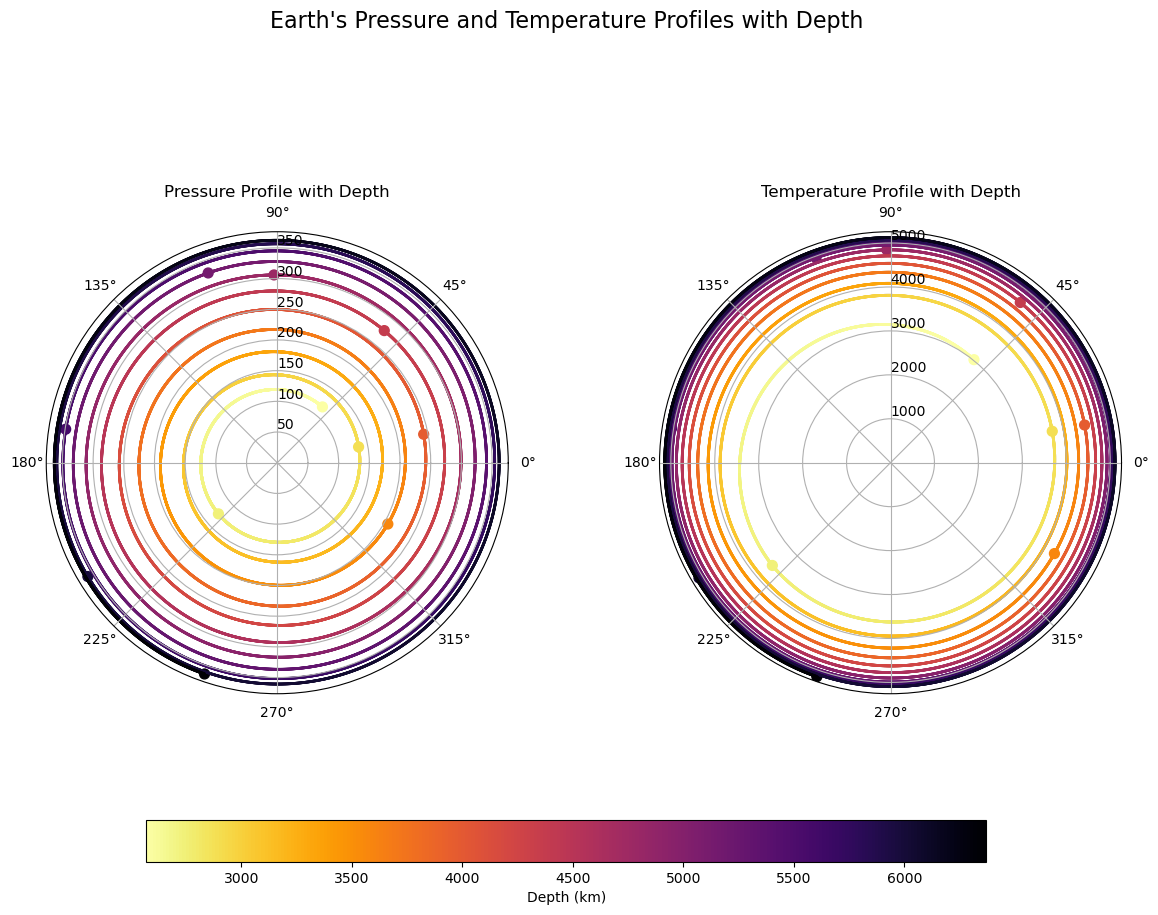

In [4]:
# Create more data points for interpolation
depth_interp = np.linspace(min(depth_values), max(depth_values), 100000)
pressure_interp = np.interp(depth_interp, depth_values, pressure_values)
temp_interp = np.interp(depth_interp, depth_values, temp_values)

# Convert depth values to radians for the polar plot
depth_radians = np.deg2rad(depth_values)
depth_interp_radians = np.deg2rad(depth_interp)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': 'polar'})

# Plot pressure as a scatter plot
scatter1 = ax1.scatter(depth_radians, pressure_values, label='Pressure (GPa)', c=depth_values, cmap='inferno_r', s=50)
ax1.scatter(depth_interp_radians, pressure_interp, c=depth_interp, cmap='inferno_r', s=1, alpha=0.5)

# Customize the polar plot for pressure
ax1.set_rlabel_position(90)
ax1.grid(True)
ax1.set_title("Pressure Profile with Depth")

# Plot temperature as a scatter plot
scatter2 = ax2.scatter(depth_radians, temp_values, label='Temperature (K)', c=depth_values, cmap='inferno_r', s=50)
ax2.scatter(depth_interp_radians, temp_interp, c=depth_interp, cmap='inferno_r', s=1, alpha=0.5)

# Customize the polar plot for temperature
ax2.set_rlabel_position(90)
ax2.grid(True)
ax2.set_title("Temperature Profile with Depth")

# Create a single depth colorbar for both subplots at the bottom
cbar = fig.colorbar(scatter1, ax=[ax1, ax2], orientation='horizontal', label='Depth (km)', pad=0.1)

# Adjust the layout for the subplots
plt.subplots_adjust(wspace=0.3)

# Move the titles and colorbar
ax1.title.set_position([0.5, 1.15])
ax2.title.set_position([0.5, 1.15])

# Increase the height of the colorbar
cbar.ax.set_position([0.2, -0.2, 0.6, 0.1])

# Set the title for the entire figure
suptitle = plt.suptitle("Earth's Pressure and Temperature Profiles with Depth", fontsize=16)

# Increase the size of the suptitle
suptitle.set_position([0.5, 1.25])

# Show the plot
plt.show()


In [1]:
#Imports

import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Raw data

data = """
0.0  6371.0  363.850   5151
200.0  6171.0  362.900   5119
400.0  5971.0  360.030   5087
600.0  5771.0  355.280   5064
800.0  5571.0  348.670   5041
1000.0  5371.0  340.240   5003
1200.0  5171.0  330.050   4965
1221.5  5149.5  328.850   4961
1400.0  4971.0  318.750   4907
1600.0  4771.0  306.150   4846
1800.0  4571.0  292.220   4769
2000.0  4371.0  277.040   4693
2200.0  4171.0  260.680   4597
2400.0  3971.0  243.250   4501
2600.0  3771.0  224.850   4383
2800.0  3571.0  205.600   4265
3000.0  3371.0  185.640   4123
3200.0  3171.0  165.120   3981
3400.0  2971.0  144.190   3816
3480.0  2891.0  135.750   3750
3600.0  2771.0  128.710   3601
3630.0  2741.0  126.970   3564
3800.0  2571.0  117.350   3018
4000.0  2371.0  106.390   2865
4200.0  2171.0   95.760   2712
4400.0  1971.0   85.430   2610
4600.0  1771.0   75.360   2509
4800.0  1571.0   65.520   2411
5000.0  1371.0   55.900   2313
5200.0  1171.0   46.490   2211
5400.0   971.0   37.290   2109
5600.0   771.0   28.290   2003
5701.0   670.0   23.830   1950
5771.0   600.0   21.040   1906
5871.0   500.0   17.130   1842
5971.0   400.0   13.350   1779
6016.0   355.0   10.775   1750
6061.0   310.0   10.200   1714
6151.0   220.0    7.110   1622
6221.0   150.0    4.780   1550
6291.0    80.0    2.450   1155
6331.0    40.0    1.122   930
6346.6   24.4    0.604   743
6356.0   15.0    0.337   630
6368.0   3.0     0.300   366
6371.0   0.0     0.000   300
"""

# Split the data into lines and extract values
lines = data.strip().split('\n')
depth_values, pressure_values, temp_values = [], [], []

for line in lines:
    values = line.split()
    # Skip the second value by only taking the 1st, 3rd, and 4th values
    depth_values.append(float(values[0]))
    pressure_values.append(float(values[2]))
    temp_values.append(float(values[3]))

# Convert lists to NumPy arrays
depth_values = np.array(depth_values)
pressure_values = np.array(pressure_values)
temp_values = np.array(temp_values)

# Reverse the pressure and temperature arrays
pressure_values = np.flip(pressure_values)
temp_values = np.flip(temp_values)

In [20]:
# Define the boundaries and properties of Earth's layers
layer_boundaries = [0, 35, 220, 660, 2890, 6371]  # Depth boundaries in km
layer_labels = ['Lithosphere', 'Asthenosphere', 'Mesosphere', 'Outer Core', 'Inner Core']
layer_colors = ['green', 'blue', 'yellow', 'salmon', 'gray']

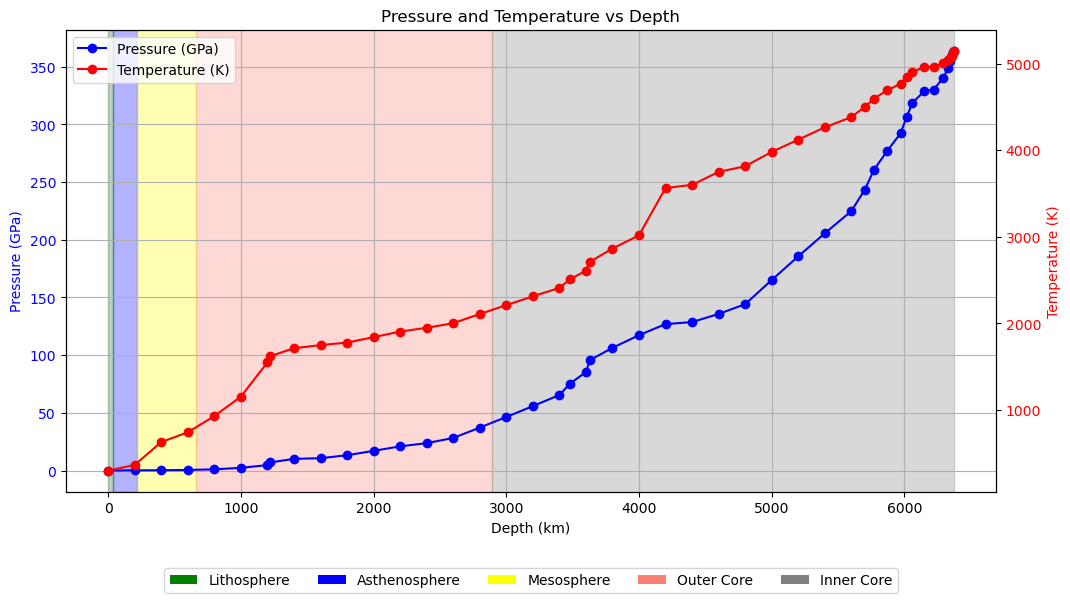

In [21]:
# Create a figure and axis for the dual y-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Pressure vs Depth on the left y-axis
ax1.plot(depth_values, pressure_values, marker='o', linestyle='-', color='b', label='Pressure (GPa)')
ax1.set_xlabel('Depth (km)')
ax1.set_ylabel('Pressure (GPa)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Temperature vs Depth on the right y-axis
ax2 = ax1.twinx()
ax2.plot(depth_values, temp_values, marker='o', linestyle='-', color='r', label='Temperature (K)')
ax2.set_ylabel('Temperature (K)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a combined legend for both ax1 and ax2 (top-left corner)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Add colored layers to the plot
for i in range(len(layer_boundaries) - 1):
    ax1.axvspan(layer_boundaries[i], layer_boundaries[i + 1], alpha=0.3, color=layer_colors[i], label=layer_labels[i])

# Create a horizontally oriented legend for the colored layers extending past the graph
layer_patches = [plt.Rectangle((0, 0), 1, 1, fc=layer_colors[i]) for i in range(len(layer_colors))]
plt.legend(layer_patches, layer_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Show the plot
plt.title('Pressure and Temperature vs Depth')
ax1.grid(True)
plt.show()

### DATASET:
https://www.geo.arizona.edu/xtal/geos306/geos306-13.htm 
<br>
https://www.geo.arizona.edu/xtal/geos306/geotherm.htm


### MARIDESULFOVIBRIO HYDROTHERMALIS

In [1]:
#imported libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Raw data

data = """
0.0  6371.0  363.850   5151
200.0  6171.0  362.900   5119
400.0  5971.0  360.030   5087
600.0  5771.0  355.280   5064
800.0  5571.0  348.670   5041
1000.0  5371.0  340.240   5003
1200.0  5171.0  330.050   4965
1221.5  5149.5  328.850   4961
1400.0  4971.0  318.750   4907
1600.0  4771.0  306.150   4846
1800.0  4571.0  292.220   4769
2000.0  4371.0  277.040   4693
2200.0  4171.0  260.680   4597
2400.0  3971.0  243.250   4501
2600.0  3771.0  224.850   4383
2800.0  3571.0  205.600   4265
3000.0  3371.0  185.640   4123
3200.0  3171.0  165.120   3981
3400.0  2971.0  144.190   3816
3480.0  2891.0  135.750   3750
3600.0  2771.0  128.710   3601
3630.0  2741.0  126.970   3564
3800.0  2571.0  117.350   3018
4000.0  2371.0  106.390   2865
4200.0  2171.0   95.760   2712
4400.0  1971.0   85.430   2610
4600.0  1771.0   75.360   2509
4800.0  1571.0   65.520   2411
5000.0  1371.0   55.900   2313
5200.0  1171.0   46.490   2211
5400.0   971.0   37.290   2109
5600.0   771.0   28.290   2003
5701.0   670.0   23.830   1950
5771.0   600.0   21.040   1906
5871.0   500.0   17.130   1842
5971.0   400.0   13.350   1779
6016.0   355.0   10.775   1750
6061.0   310.0   10.200   1714
6151.0   220.0    7.110   1622
6221.0   150.0    4.780   1550
6291.0    80.0    2.450   1155
6331.0    40.0    1.122   930
6346.6   24.4    0.604   743
6356.0   15.0    0.337   630
6368.0   3.0     0.300   366
6371.0   0.0     0.000   300
"""

# Split the data into lines and extract values
lines = data.strip().split('\n')
depth_values, pressure_values, temp_values = [], [], []

for line in lines:
    values = line.split()
    # Skip the second value by only taking the 1st, 3rd, and 4th values
    depth_values.append(float(values[0]))
    pressure_values.append(float(values[2]))
    temp_values.append(float(values[3]))

# Convert lists to NumPy arrays
depth_values = np.array(depth_values)
pressure_values = np.array(pressure_values)
temp_values = np.array(temp_values)

# Reverse the pressure and temperature arrays
pressure_values = np.flip(pressure_values)
temp_values = np.flip(temp_values)

In [3]:
# Define the boundaries and properties of Earth's layers
layer_boundaries = [0, 35, 220, 660, 2890, 6371]  # Depth boundaries in km
layer_labels = ['Lithosphere', 'Asthenosphere', 'Mesosphere', 'Outer Core', 'Inner Core']
layer_colors = ['green', 'blue', 'yellow', 'salmon', 'gray']

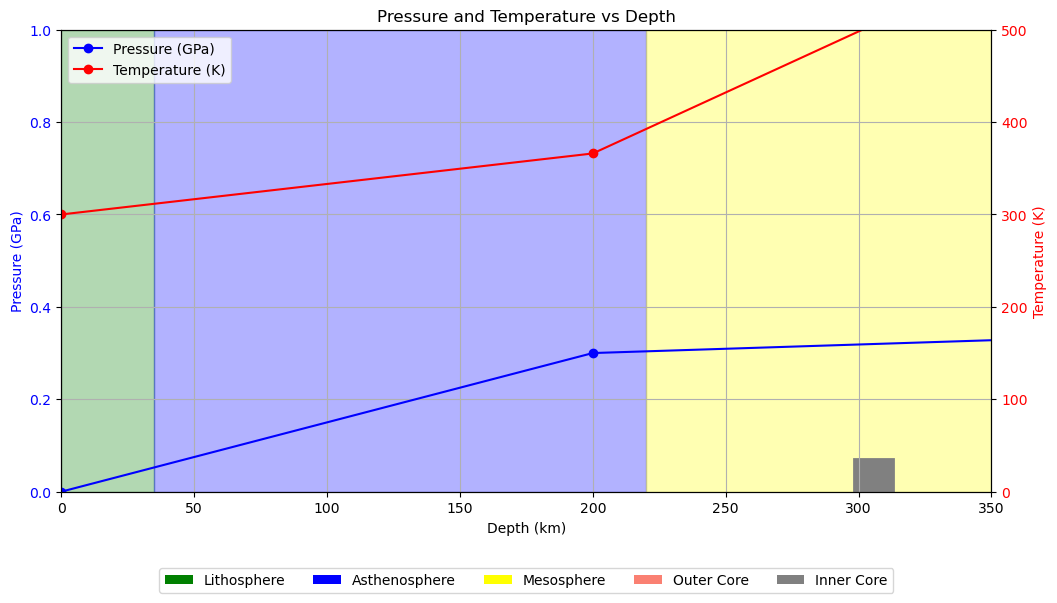

In [5]:
# Create a figure and axis for the dual y-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Pressure vs Depth on the left y-axis
ax1.plot(depth_values, pressure_values, marker='o', linestyle='-', color='b', label='Pressure (GPa)')
ax1.set_xlabel('Depth (km)')
ax1.set_ylabel('Pressure (GPa)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Temperature vs Depth on the right y-axis
ax2 = ax1.twinx()
ax2.plot(depth_values, temp_values, marker='o', linestyle='-', color='r', label='Temperature (K)')
ax2.set_ylabel('Temperature (K)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a combined legend for both ax1 and ax2 (top-left corner)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Add colored layers to the plot
for i in range(len(layer_boundaries) - 1):
    ax1.axvspan(layer_boundaries[i], layer_boundaries[i + 1], alpha=0.3, color=layer_colors[i], label=layer_labels[i])

# Create a horizontally oriented legend for the colored layers extending past the graph
layer_patches = [plt.Rectangle((0, 0), 1, 1, fc=layer_colors[i]) for i in range(len(layer_colors))]
plt.legend(layer_patches, layer_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Define the temperature and pressure range for the box
box_temp_range = [298.15, 313.15]
box_pressure_range = [0.0001, 0.07]

# Create the box patch
box = plt.Rectangle((box_temp_range[0], box_pressure_range[0]), 
                    box_temp_range[1] - box_temp_range[0], 
                    box_pressure_range[1] - box_pressure_range[0], 
                    fill=True, color='gray', linestyle='solid', linewidth=2)

# Add the box patch to the plot
ax1.add_patch(box)

# Set the x and y-axis limits for zooming
ax1.set_xlim(0, 350)  # Adjust the values as needed for the depth axis
ax1.set_ylim(0, 1)   # Adjust the values as needed for the pressure axis
ax2.set_xlim(0, 350)  # Adjust the values as needed for the depth axis
ax2.set_ylim(0, 500)  # Adjust the values as needed for the temperature axis

# Show the plot
plt.title('Pressure and Temperature vs Depth')
ax1.grid(True)
plt.show()

**What percentage of the Earth is habitable by Desulfovibrio?**

In [36]:
# Function to calculate the volume of a spherical shell
def spherical_shell_volume(inner_radius, outer_radius):
    return (4/3) * np.pi * (outer_radius**3 - inner_radius**3)

# Define the habitable temperature and pressure ranges
habitable_temperature_range = (298.15, 313.15)  # in K
habitable_pressure_range = (0,0.07)  # in GPa

# Initialize total Earth volume
total_volume = 4/3 * np.pi * (6371**3)  # Assuming Earth's radius is 6371 km

# Initialize habitable volume
habitable_volume = 0.0

# Loop through each layer and calculate the habitable volume
for i in range(len(layer_boundaries) - 1):
    # Depth boundaries for the current layer
    depth_start = layer_boundaries[i]
    depth_end = layer_boundaries[i + 1]

    # Calculate the volume of the layer as a spherical shell
    layer_bvvolume = spherical_shell_volume(depth_start, depth_end)

    # Calculate the intersection of temperature and pressure ranges
    habitable_temperature_start = max(temp_values[i], habitable_temperature_range[0])
    habitable_temperature_end = min(temp_values[i], habitable_temperature_range[1])

    habitable_pressure_start = max(pressure_values[i], habitable_pressure_range[0])
    habitable_pressure_end = min(pressure_values[i], habitable_pressure_range[1])

    # Check if there is an intersection
    if habitable_temperature_start <= habitable_temperature_end and \
       habitable_pressure_start <= habitable_pressure_end:
        # Calculate the volume of the habitable portion within the layer
        habitable_volume += layer_volume

# Calculate the percentage of the Earth's volume that is habitable
percentage_habitable = (habitable_volume / total_volume) * 100

# Print the result
print(f"Percentage of Earth's volume habitable for Desulfovibrio: {percentage_habitable:.6f}%")


Percentage of Earth's volume habitable for Desulfovibrio: 0.682208%


C:\Users\cesay\AppData\Local\Temp\ipykernel_27632\207888387.py:3: RuntimeWarning: overflow encountered in scalar subtract
  return (4/3) * np.pi * (outer_radius**3 - inner_radius**3)


#### Icy Moons: Europa, Titan, Enceladus, Ganymede
collect the data and make geotherm data!